In [1]:
import tensorflow as tf

In [2]:
mnist= tf.keras.datasets.mnist

In [3]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

In [4]:
x_train.shape

(60000, 28, 28)

In [5]:
import matplotlib.pyplot as plt

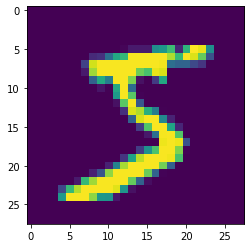

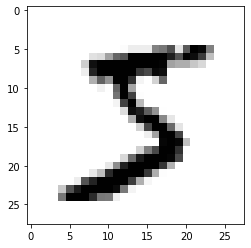

In [6]:
plt.imshow(x_train[0])
plt.show()
plt.imshow(x_train[0],cmap=plt.cm.binary)

In [7]:
print(x_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

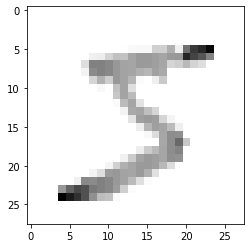

In [8]:
x_train=tf.keras.utils.normalize(x_train,axis=1)
x_test=tf.keras.utils.normalize(x_test,axis=1)
plt.imshow(x_train[0],cmap=plt.cm.binary)

In [9]:
print(x_train[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [10]:
print(y_train[0])

5


In [11]:
import numpy as np
IMG_SIZE=28
x_trainr=np.array(x_train).reshape(-1, IMG_SIZE, IMG_SIZE,1)
x_testr=np.array(x_test).reshape(-1, IMG_SIZE, IMG_SIZE,1)
print("training samples dimension",x_trainr.shape)
print("testing samples dimension",x_testr.shape)

training samples dimension (60000, 28, 28, 1)
testing samples dimension (10000, 28, 28, 1)


In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D

In [13]:
model= Sequential()

model.add(Conv2D(64,(3,3),input_shape=x_trainr.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation("relu"))

model.add(Dense(32))
model.add(Activation("relu"))

model.add(Dense(10))
model.add(Activation('softmax'))

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
activation (Activation)      (None, 26, 26, 64)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
activation_1 (Activation)    (None, 11, 11, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          3

In [15]:
print("Total Training Samples = ",len(x_trainr))

Total Training Samples =  60000


In [16]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [17]:
model.fit(x_trainr,y_train,epochs=5,validation_split=0.3)

Epoch 1/5
1313/1313 [==============================] - 56s 43ms/step - loss: 0.3387 - accuracy: 0.8937 - val_loss: 0.1235 - val_accuracy: 0.9617
Epoch 2/5
1313/1313 [==============================] - 56s 43ms/step - loss: 0.1115 - accuracy: 0.9655 - val_loss: 0.1276 - val_accuracy: 0.9611
Epoch 3/5
1313/1313 [==============================] - 56s 42ms/step - loss: 0.0779 - accuracy: 0.9762 - val_loss: 0.0890 - val_accuracy: 0.9726
Epoch 4/5
1313/1313 [==============================] - 56s 43ms/step - loss: 0.0611 - accuracy: 0.9819 - val_loss: 0.0806 - val_accuracy: 0.9764
Epoch 5/5
1313/1313 [==============================] - 55s 42ms/step - loss: 0.0483 - accuracy: 0.9850 - val_loss: 0.0621 - val_accuracy: 0.9812


In [18]:
test_loss,test_acc=model.evaluate(x_testr,y_test)
print("Test Loss on 10,000 test samples",test_loss)
print("Validation Accuracy on 10,000 test samples",test_acc)

313/313 [==============================] - 4s 12ms/step - loss: 0.0617 - accuracy: 0.9825
Test Loss on 10,000 test samples 0.061709098517894745
Validation Accuracy on 10,000 test samples 0.9825000166893005


In [19]:
predictions = model.predict([x_testr])

In [20]:
print(predictions)

[[3.0544170e-06 3.5294244e-07 1.5289464e-06 ... 9.9996316e-01
  1.0605680e-06 1.6850319e-05]
 [1.5774343e-05 2.1541633e-05 9.9995935e-01 ... 1.5159994e-06
  2.7026834e-07 2.8868405e-08]
 [2.7801971e-06 9.9990463e-01 8.0965119e-06 ... 2.0371484e-05
  2.4621738e-06 4.5905549e-06]
 ...
 [3.9611399e-09 2.8580561e-07 1.4545839e-09 ... 1.3379665e-06
  3.6405547e-06 6.9438652e-06]
 [4.3975497e-06 1.1548635e-07 5.2060532e-08 ... 1.3710654e-11
  4.3567661e-06 1.3773779e-06]
 [8.8430691e-04 1.6069728e-07 1.7322750e-04 ... 3.3259531e-10
  4.7769037e-05 4.4525959e-06]]


In [21]:
print(np.argmax(predictions[0]))

7


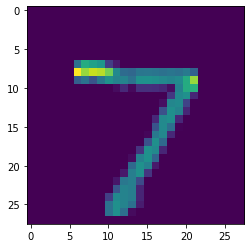

In [22]:
plt.imshow(x_test[0])

In [23]:
print(np.argmax(predictions[128]))

8


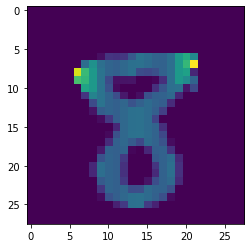

In [24]:
plt.imshow(x_test[128])

In [25]:
import cv2

In [26]:
img=cv2.imread("five.png")

In [27]:
from PIL import Image

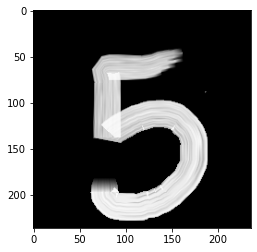

In [28]:
img1=Image.open('C:/Users/ASUS/Downloads/image/five.png')
plt.imshow(img1)

In [29]:
type(img1)

PIL.PngImagePlugin.PngImageFile

In [30]:
img_ar=np.asarray(img1)

In [31]:
img_ar.shape

(236, 236, 3)

In [32]:
gray=cv2.cvtColor(img_ar,cv2.COLOR_BGR2GRAY)

In [33]:
gray.shape

(236, 236)

In [34]:
resized=cv2.resize(gray,(28,28),interpolation=cv2.INTER_AREA)

In [35]:
resized.shape

(28, 28)

In [36]:
newing = tf.keras.utils.normalize(resized,axis=1)

In [37]:
newing=np.array(newing).reshape(-1,IMG_SIZE,IMG_SIZE,1)

In [38]:
newing.shape

(1, 28, 28, 1)

In [39]:
predictions=model.predict(newing)

In [40]:
print(np.argmax(predictions))

5
